### Offsets Blending - Preliminary Test

In [9]:
%matplotlib inline
# - Python Dependencies
from __future__ import print_function
import pathlib
import matplotlib.pyplot as plt
from offsets_layer import OffsetsLayer
from utils.set_path import set_path_to_data_dir
from utils.mpl_utils import add_colorbar
# - change matplotlib default setting
plt.rc('font', family='monospace')
plt.rc('font', weight='bold')
plt.style.use('seaborn-deep')

#### Default Test Parameters

In [10]:
# - Test Parameters
# - set path to project data directory
data_path = pathlib.Path(set_path_to_data_dir())
# - import sample Offset Layer
layer_name = 'layer2'

# - Outliers Mask Computation Parameters
metric = 'covariance'
threshold = 10
window_az = 50
window_rg = 50

#### Load Offset Layer

In [11]:
o_layer = OffsetsLayer(data_path.joinpath(layer_name))

#### Show Offset Layer

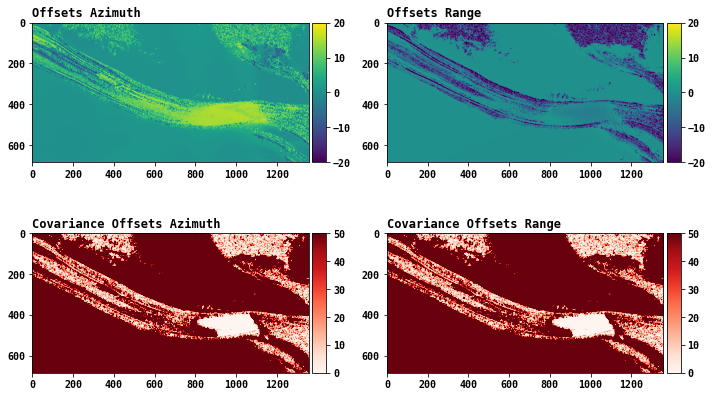

In [12]:
# - Show Offsets
o_layer.show_offsets()

In [13]:
# - Compute Outliers Mask
outliers_mask = o_layer.identify_outliers(metric=metric,
                                          threshold=threshold,
                                          window_az=window_az,
                                          window_rg=window_rg)

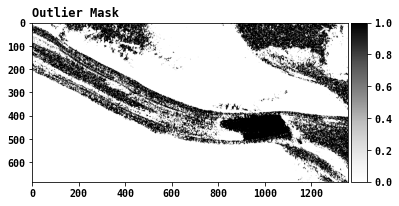

In [14]:
# - Show Outliers Mask
fig_size = (6, 4)
fig = plt.figure(figsize=fig_size)
ax_b = fig.add_subplot(111)
ax_b.set_title('Outlier Mask', weight='bold', loc='left')
im_b = ax_b.imshow(outliers_mask['binary_mask'].T,
                   cmap=plt.get_cmap('Greys'))
add_colorbar(ax_b, im_b)
plt.show()
plt.close()

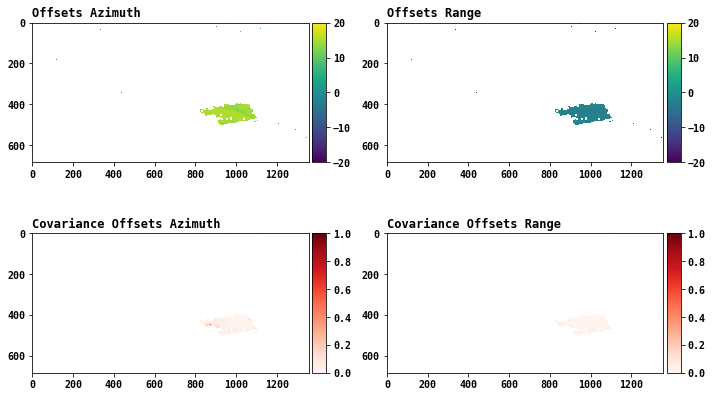

In [15]:
# - Apply Outlier Mask to the selected Layer
o_layer.mask_outliers(outliers_mask['binary_mask'])

# - Show Offsets after Outlier Removal
o_layer.show_offsets(cov_range=(0, 1))